# Naive Bayes for Text Classification

## Introduction

Hi everyone, in this notebook we are going to work on a dataset that I retrieved from [Kaggle](https://www.kaggle.com/team-ai/spam-text-message-classification). The dataset contains SMS messages labeled as *ham* (non-spam) or *spam*. We'll use scikit-learn's Naive Bayes Classifier to predict these labels.

Dataset origin: [link](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/)

### How does it work ?

Naive Bayes is an algorithm which is commonly used in natural language processing (NLP) tasks such as spam filtering, sentiment analysis, classification, recommendation. It is based on *Bayes' Theorem* as shown below. 

<img src="bayesian.png" width="300px" height="300px" align="left" /><br><br><br><br><br>

*P(A|B)* = probability of A if B occurs <br>
*P(B|A)* = probability of B if A occurs <br>
*P(A)* = probability of A <br>
*P(B)* = probability of A <br>

A Naive Bayes classifier gives us the conditional probabilities of events occur related to each other by using Bayes' Theorem. If you would like to deep into, please visit [here](https://www.kaggle.com/prashant111/naive-bayes-classifier-tutorial).<br>
<br>
In scikit-learn, there are 3 types naive bayes algorithms.

**Gaussian Naive Bayes:** It works with continuous attributes, it assumes the data normally distributed (Gaussian Distribution) <br><br>
**Multinomial Naive Bayes:** It works with frequencies of features.It is used text classification or <br><br>
**Bernoulli Naive Bayes:** It works with multinomial binary variables, usually used for text classification like multinomial<br><br>

We'll use **Multinomal** in this notebook.

### Basics of Natural Language Processing

Since we'll use *Naive Bayes* in a *text classification* task, I would like to explain briefly some concepts that are we going to use.<br>

**Lemmatization:** It is a process of make the same words in their stem. For example run, ran, running are different in terms of Python. We lemmatiza the word to get run.<br><br>
**Stop words:** The words that are not important in terms of the context<br><br>
**Tokenization:** The process of extracting words in a sentence by spaces and punctuations. In this project we'll use nltk's [word_tokenize](https://www.nltk.org/api/nltk.tokenize.html)<br><br>
**Bag Of Words:** BoW is the representation of text data in a numerical way that machine learning algoritms can work with. <br><br>
**Tf-idf (Term Frequency - Inverse Term Frequency):** It is a statistical concept to be used to get importance of words in corpus. We'll use scikit-learn's *TfidfVectorizer*. The vectorizer will calculate the weight of each word in corpus and will return a tf-idf matrix. You can find further information [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)<br><br>
<img src="tfidf.png" width="300px" height="300px" align="left" /><br><br><br><br><br>
*td* = Term frequency (number of occurance each i in j)<br>
*df* = Document frequency <br>
*N* = Number of documents<br>
*w* = td-idf weight
for each *i* and *j* (document).

### Requirements

Before start the project. We have to install the necessary libraries via following commands.

`pip install -U scikit-learn`

`pip install wordcloud`

`pip install --user -U nltk`

In [61]:
# Fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLTK to use its functionalities on texts
"""DO NOT forget to download followings if you do not have
# nltk.download('punkt')
#nltk.download('wordnet')
"""
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

## 1. First Steps

Let's start with importing the data into a pandas DataFrame called data

In [65]:
data = pd.read_csv('../datasets/spam_text_message.csv')

Now we can look at main features of the dataset

In [66]:
# Display firt five rows
display(data.head())

# Display the summary statistics
display(data.describe())

# Print the info
print(data.info())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


Our dataset has **Message** and **Category** columns which consist of *object* data type. There are 5572 messages. We have to check whether the category data is *balanced or not*.

ham     4825
spam     747
Name: Category, dtype: int64

ham     0.865937
spam    0.134063
Name: Category, dtype: float64


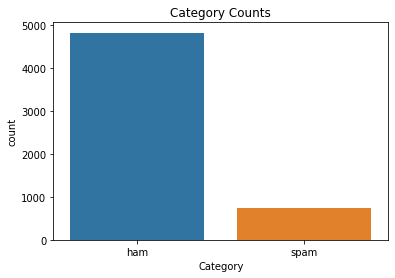

In [67]:
# Print the counts of each category
print(data['Category'].value_counts())

print()

# Print the proportions of each category
print(data['Category'].value_counts(normalize=True))

# Visualize the Categories
sns.countplot(data['Category'])
plt.title("Category Counts")
plt.show()

As we can see above, the dataset is unbalanced. We have to consider this when we build our model. As well as, we need to encode the labels to use our machine learning model. To achieve this we'll use the Label Encoder from scikit-learn

In [68]:
# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
data['Category_enc'] = le.fit_transform(data['Category'])

# Display the first five rows again to see the result
display(data.head())

# Print the datatypes
print(data.dtypes)

,Category,Message,Category_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category        object
Message         object
Category_enc     int32
dtype: object


We got the encoded categories. Now, *0 = ham* and *1 = spam*.

## 2. EDA and Preprocessing

Before build the classification model, let's explore the data. First we'll compare the word counts of messages in each category

Category
ham     14.310259
spam    23.812584
Name: word_count, dtype: float64


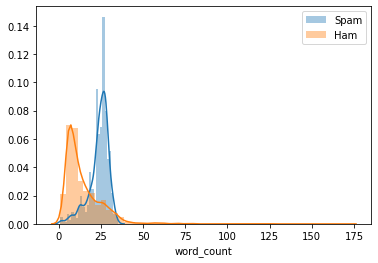

In [69]:
# Store the number of words in each messages
data['word_count'] = data['Message'].str.split().str.len()

# Print the average number of words in each category
print(data.groupby('Category')['word_count'].mean())

# Visualize the distribution of word counts in each category
sns.distplot(data[data['Category']=='spam']['word_count'], label='Spam')
sns.distplot(data[data['Category']=='ham']['word_count'], label='Ham'),
plt.legend()
plt.show()

Apparently, spams tend to contain more number of words. What about the most common words in each ?

In [70]:
# Make the letters lower case and tokenize the words
tokenized_messages = data['Message'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [go, until, jurong, point, ,, crazy.., availab...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568      [will, ü, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


There some non-alphanumeric characters ( * ' " - ) and stop words like a, and, the etc. Let's discard them

In [71]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)

print(tokenized_messages)

0       [go, until, jurong, point, available, only, in...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, not, think, he, goes, to, usf, he...
                              ...                        
5567    [this, is, the, time, we, have, tried, contact...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5572, dtype: object

It's time to deal with the stop words. We've already imported *stopwords* from *nltk*.

In [29]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

0       [go, jurong, point, available, bugis, n, great...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [time, tried, contact, u, pound, prize, claim,...
5568                   [ü, b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object


Moreover, we need to lemmatize the words. We've already imported *WordNetLemmatizer* from *nltk*.

In [30]:
# Define a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

0       go jurong point available bugis n great world ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


Let's replace Message column with tokenized_messages

In [31]:
# Replace the columns with tokenized messages
data['Message'] = tokenized_messages

# Display the first five rows
display(data.head())

,Category,Message,Category_enc,word_count
0,ham,go jurong point available bugis n great world ...,0,20
1,ham,ok lar joking wif u oni,0,6
2,spam,free entry wkly comp win fa cup final tkts may...,1,28
3,ham,u dun say early hor u c already say,0,11
4,ham,nah think go usf life around though,0,13


Visualize the words mostly used in each type of messages.

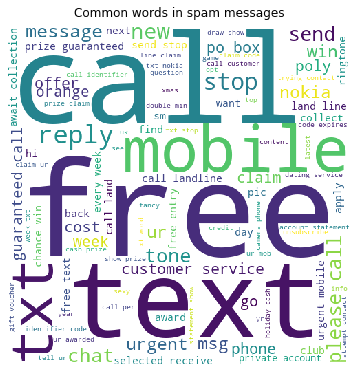

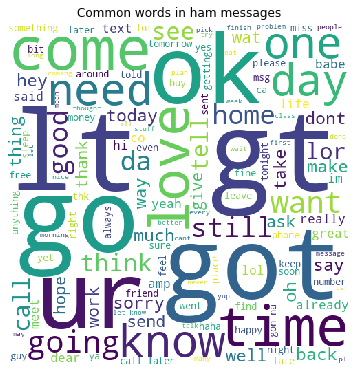

In [32]:
# Get the spam messages
spam = data[data['Category']=='spam']['Message'].str.cat(sep=', ')

# Get the ham messages
ham = data[data['Category']=='ham']['Message'].str.cat(sep=', ')

# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of message
spam_wc = wc.generate(spam)

# plot the world cloud for spam                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(spam_wc) 
plt.axis("off") 
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0) 
plt.show() 
ham_wc = wc.generate(ham)

# plot the world cloud for spam                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(ham_wc) 
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0) 
plt.show() 

It seems that ham messages contain lot's of abbreviation and informal words. Spams tend to contain mostly *free, mobile, cole, text*

## 3. Build the model

First select the our features and the target.

In [33]:
# Select the features and the target
X = data['Message']
y = data['Category_enc']

We need to split our data into train and test sets. We'll use **stratify** parameter of train_test_split since our data is unbalanced

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

Now, we can get the tf-idf by using scikit-learn's TfidfVectorizer. Tf-idf stands for *term frequency - inverse document frequency*. It is commonly used in Natural Language Processing to determine the most important words in the document.

In [43]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

Now we can build the our machine learning model.

In [78]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(tfidf_test, y_test))

Accuracy: 0.9587443946188341


It gives us approximately 96% accuracy. 

## 4. Evaluate the model

The accuracy score is not enought to say our model's performance great. We need to do more calculation to be make sure.

Confusion Matrix

[[966   0]
 [ 46 103]]


Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


ROC AUC Score: 0.8456375838926175


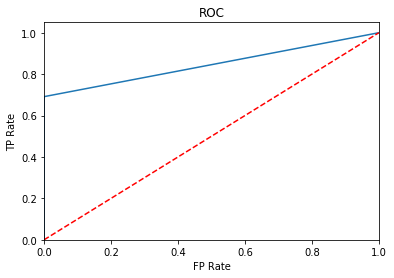

In [64]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

Area under the ROC curve gave us lower but it still looks fine. According to confusion matrix and classification report our model is perfect to detect spams but not hams

This is the and of the notebook. I hope it can be helpful to understand using *Naive Bayes* classifier in Python.